In [ ]:
!unzip '/content/UPI_data_315.zip'

Archive:  /content/UPI_data_315.zip
  inflating: transactions.csv        


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/transactions.csv')

In [ ]:
df.head()

,Transaction ID,Timestamp,Sender Name,Sender UPI ID,Receiver Name,Receiver UPI ID,Amount (INR),Status
0,4d3db980-46cd-4158-a812-dcb77055d0d2,2024-06-22 04:06:38,Tiya Mall,4161803452@okaxis,Mohanlal Golla,7776849307@okybl,3907.34,FAILED
1,099ee548-2fc1-4811-bf92-559c467ca792,2024-06-19 06:04:49,Mohanlal Bakshi,8908837379@okaxis,Mehul Sankaran,7683454560@okaxis,8404.55,SUCCESS
2,d4c05732-6b1b-4bab-90b9-efe09d252b99,2024-06-04 04:56:09,Kismat Bora,4633654150@okybl,Diya Goel,2598130823@okicici,941.88,SUCCESS
3,e8df92ee-8b04-4133-af5a-5f412180c8ab,2024-06-09 09:56:07,Ayesha Korpal,7018842771@okhdfcbank,Rhea Kothari,2246623650@okaxis,8926.00,SUCCESS
4,e7d675d3-04f1-419c-a841-7a04662560b7,2024-06-25 08:38:19,Jivin Batta,1977143985@okybl,Baiju Issac,5245672729@okybl,2800.55,SUCCESS


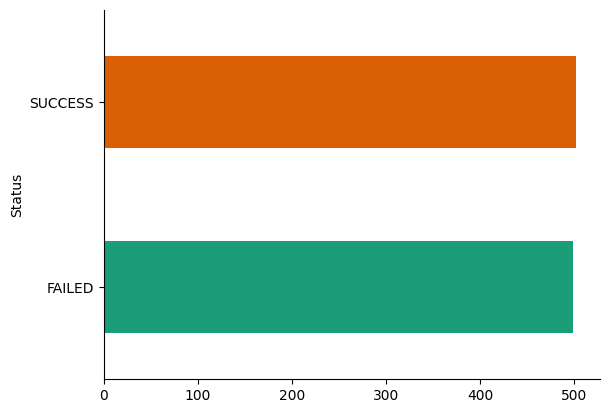

In [ ]:


from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.columns

In [ ]:
for col in df.columns:
    print(f"Unique values in {col} is: {df[col].nunique()}")

Unique values in Transaction ID is: 1000
Unique values in Timestamp is: 1000
Unique values in Sender Name is: 997
Unique values in Sender UPI ID is: 1000
Unique values in Receiver Name is: 996
Unique values in Receiver UPI ID is: 1000
Unique values in Amount (INR) is: 999
Unique values in Status is: 2


In [ ]:
df['Status'].value_counts()

,count
Status,
SUCCESS,502
FAILED,498


1. Now I will extract day,time,month and year from transaction timestamp.
2. I will extract upi id after @ for both reciever as well as sender.
3. I will drop Transaction Id, Reciever name and Sender Name from df.

In [ ]:
df.drop(columns=['Transaction ID','Sender Name','Receiver Name'],inplace=True)

In [ ]:
df

,Timestamp,Sender UPI ID,Receiver UPI ID,Amount (INR),Status
0,2024-06-22 04:06:38,4161803452@okaxis,7776849307@okybl,3907.34,FAILED
1,2024-06-19 06:04:49,8908837379@okaxis,7683454560@okaxis,8404.55,SUCCESS
2,2024-06-04 04:56:09,4633654150@okybl,2598130823@okicici,941.88,SUCCESS
3,2024-06-09 09:56:07,7018842771@okhdfcbank,2246623650@okaxis,8926.00,SUCCESS
4,2024-06-25 08:38:19,1977143985@okybl,5245672729@okybl,2800.55,SUCCESS
...,...,...,...,...,...
995,2024-07-03 23:15:06,7041132054@okhdfcbank,7858014473@okicici,9270.15,SUCCESS
996,2024-06-15 15:42:57,1200592114@okybl,2795494339@okhdfcbank,2278.32,FAILED
997,2024-06-18 17:27:37,6922445535@okicici,5207563362@okybl,4857.89,FAILED
998,2024-06-05 21:57:36,4638471232@okhdfcbank,9348631179@okaxis,9475.68,FAILED


# Data Preprocessing

In [ ]:
def get_year(row):
    return row[:4]
def get_month(row):
    return row[5:7]
def get_day(row):
    return row[8:10]

In [ ]:
df['Year']=df['Timestamp'].apply(get_year)
df['Month']=df['Timestamp'].apply(get_month)
df['Day']=df['Timestamp'].apply(get_day)

In [ ]:
df['Year']=df['Year'].astype('int')
df['Month']=df['Month'].astype('int')
df['Day']=df['Day'].astype('int')

In [ ]:
print(df['Year'].value_counts())
print(df['Month'].value_counts())
print(df['Day'].value_counts())

Year
2024    1000
Name: count, dtype: int64
Month
6    892
7    108
Name: count, dtype: int64
Day
25    45
2     43
14    42
7     41
20    39
12    37
15    37
27    36
21    35
4     34
9     34
17    34
29    34
18    34
13    33
8     33
1     33
10    32
3     32
24    32
22    32
19    31
23    30
11    30
6     28
30    27
16    26
26    26
28    25
5     25
Name: count, dtype: int64


In [ ]:
df['Timestamp']=df['Timestamp'].apply(lambda x: pd.to_datetime(x))

In [ ]:
def get_hours(row):
    return row.hour
def get_minutes(row):
    return row.minute

In [ ]:
df['Hour']=df['Timestamp'].apply(get_hours)
df['Minute']=df['Timestamp'].apply(get_minutes)

In [ ]:
df.drop(columns=['Year','Month','Timestamp'],inplace=True)

In [ ]:
df

,Sender UPI ID,Receiver UPI ID,Amount (INR),Status,Day,Hour,Minute
0,4161803452@okaxis,7776849307@okybl,3907.34,FAILED,22,4,6
1,8908837379@okaxis,7683454560@okaxis,8404.55,SUCCESS,19,6,4
2,4633654150@okybl,2598130823@okicici,941.88,SUCCESS,4,4,56
3,7018842771@okhdfcbank,2246623650@okaxis,8926.00,SUCCESS,9,9,56
4,1977143985@okybl,5245672729@okybl,2800.55,SUCCESS,25,8,38
...,...,...,...,...,...,...,...
995,7041132054@okhdfcbank,7858014473@okicici,9270.15,SUCCESS,3,23,15
996,1200592114@okybl,2795494339@okhdfcbank,2278.32,FAILED,15,15,42
997,6922445535@okicici,5207563362@okybl,4857.89,FAILED,18,17,27
998,4638471232@okhdfcbank,9348631179@okaxis,9475.68,FAILED,5,21,57


In [ ]:
def get_upi(row):
    indx=row.index('@')
    return row[indx+1:]

In [ ]:
df['Sender']=df['Sender UPI ID'].apply(get_upi)
df['Receiver']=df['Receiver UPI ID'].apply(get_upi)

In [ ]:
df.drop(columns=['Sender UPI ID','Receiver UPI ID'],inplace=True)

In [ ]:
df

,Amount (INR),Status,Day,Hour,Minute,Sender,Receiver
0,3907.34,FAILED,22,4,6,okaxis,okybl
1,8404.55,SUCCESS,19,6,4,okaxis,okaxis
2,941.88,SUCCESS,4,4,56,okybl,okicici
3,8926.00,SUCCESS,9,9,56,okhdfcbank,okaxis
4,2800.55,SUCCESS,25,8,38,okybl,okybl
...,...,...,...,...,...,...,...
995,9270.15,SUCCESS,3,23,15,okhdfcbank,okicici
996,2278.32,FAILED,15,15,42,okybl,okhdfcbank
997,4857.89,FAILED,18,17,27,okicici,okybl
998,9475.68,FAILED,5,21,57,okhdfcbank,okaxis


In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
le=LabelEncoder()
df['Status']=le.fit_transform(df['Status'])

In [ ]:
df

,Amount (INR),Status,Day,Hour,Minute,Sender,Receiver
0,3907.34,0,22,4,6,okaxis,okybl
1,8404.55,1,19,6,4,okaxis,okaxis
2,941.88,1,4,4,56,okybl,okicici
3,8926.00,1,9,9,56,okhdfcbank,okaxis
4,2800.55,1,25,8,38,okybl,okybl
...,...,...,...,...,...,...,...
995,9270.15,1,3,23,15,okhdfcbank,okicici
996,2278.32,0,15,15,42,okybl,okhdfcbank
997,4857.89,0,18,17,27,okicici,okybl
998,9475.68,0,5,21,57,okhdfcbank,okaxis


In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['Sender', 'Receiver']

In [ ]:
encoder=OneHotEncoder(sparse_output=False,drop='first')
ohe_data=encoder.fit_transform(df[categorical_columns])

In [ ]:
new_df=pd.DataFrame(ohe_data,columns=encoder.get_feature_names_out(categorical_columns))

In [ ]:
# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df, new_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_columns, axis=1)

In [ ]:
df_encoded

,Amount (INR),Status,Day,Hour,Minute,Sender_okhdfcbank,Sender_okicici,Sender_oksbi,Sender_okybl,Receiver_okhdfcbank,Receiver_okicici,Receiver_oksbi,Receiver_okybl
0,3907.34,0,22,4,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,8404.55,1,19,6,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,941.88,1,4,4,56,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,8926.00,1,9,9,56,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2800.55,1,25,8,38,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9270.15,1,3,23,15,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
996,2278.32,0,15,15,42,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
997,4857.89,0,18,17,27,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
998,9475.68,0,5,21,57,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_encoded.corr()

,Amount (INR),Status,Day,Hour,Minute,Sender_okhdfcbank,Sender_okicici,Sender_oksbi,Sender_okybl,Receiver_okhdfcbank,Receiver_okicici,Receiver_oksbi,Receiver_okybl
Amount (INR),1.000000,0.020925,-0.025591,0.021028,-0.001810,-0.026170,0.005512,0.035296,0.003945,-0.064816,-0.002272,-0.000433,0.005516
Status,0.020925,1.000000,0.013158,-0.023094,-0.062481,-0.027519,0.027634,0.029917,0.010530,-0.086399,-0.009463,0.033442,0.020549
Day,-0.025591,0.013158,1.000000,0.023951,0.012075,-0.004749,0.048627,-0.048604,-0.003885,-0.036145,0.042446,0.020728,0.015988
Hour,0.021028,-0.023094,0.023951,1.000000,-0.016051,0.081547,-0.011648,-0.002671,-0.063879,-0.043645,0.042416,-0.015638,0.032517
Minute,-0.001810,-0.062481,0.012075,-0.016051,1.000000,0.051365,-0.005941,0.011873,-0.033723,0.020897,0.017711,-0.047360,0.008340
Sender_okhdfcbank,-0.026170,-0.027519,-0.004749,0.081547,0.051365,1.000000,-0.245089,-0.247335,-0.239834,-0.040344,0.021936,-0.022473,0.023001
Sender_okicici,0.005512,0.027634,0.048627,-0.011648,-0.005941,-0.245089,1.000000,-0.261823,-0.253883,-0.055371,0.041465,0.012731,0.024810
Sender_oksbi,0.035296,0.029917,-0.048604,-0.002671,0.011873,-0.247335,-0.261823,1.000000,-0.256209,0.008325,-0.023425,0.021483,-0.022121
Sender_okybl,0.003945,0.010530,-0.003885,-0.063879,-0.033723,-0.239834,-0.253883,-0.256209,1.000000,0.095746,-0.017341,-0.010173,-0.028865
Receiver_okhdfcbank,-0.064816,-0.086399,-0.036145,-0.043645,0.020897,-0.040344,-0.055371,0.008325,0.095746,1.000000,-0.257070,-0.248366,-0.252330


# Splitting X and Y

In [ ]:
X=df_encoded.drop(columns=['Status'])
y=df_encoded['Status']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2024)

In [ ]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

# Model Building and Evaluation

In [ ]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
print(accuracy_score(lr.predict(X_test),y_test))
print(confusion_matrix(lr.predict(X_test),y_test))

0.53
[[50 44]
 [50 56]]


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier

In [ ]:
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
et=ExtraTreesClassifier()

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
print(accuracy_score(dt.predict(X_test),y_test))

0.445


In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
print(accuracy_score(rf.predict(X_test),y_test))

0.465


In [ ]:
et.fit(X_train,y_train)

ExtraTreesClassifier()

In [ ]:
print(accuracy_score(et.predict(X_test),y_test))

0.49


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
print(accuracy_score(knn.predict(X_test),y_test))
print(confusion_matrix(knn.predict(X_test),y_test))

0.52
[[53 49]
 [47 51]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # You can adjust n_estimators
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.506 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.550 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.506 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.506 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.494 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.519 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.512 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.500 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.494 total time=   0.1s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.463 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

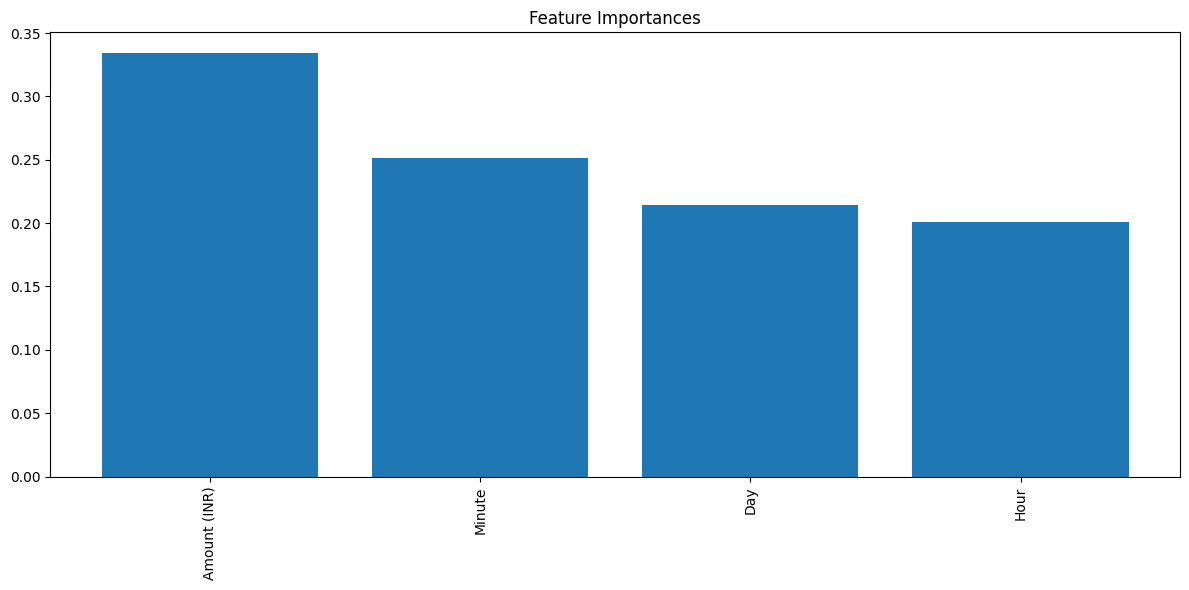

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Support Vector Classifier
svc = SVC()
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']}
grid = GridSearchCV(svc, param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(accuracy_score(grid.predict(X_test), y_test))


# Further hyperparameter tuning for RandomForestClassifier
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Best hyperparameters for RandomForest:", grid_rf.best_params_)
print("Best accuracy for RandomForest:", grid_rf.best_score_)

y_pred_rf_tuned = grid_rf.predict(X_test)
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
print(f"Tuned Random Forest Accuracy: {accuracy_rf_tuned}")

# Feature Importance
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Use only 'Amount', 'Minute', 'Day', and 'Hour' features
X = df_encoded[['Amount (INR)', 'Minute', 'Day', 'Hour']]
y = df_encoded['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Building and Evaluation using RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy (4 features): {accuracy_rf}")

Random Forest Accuracy (4 features): 0.425


In [ ]:
import joblib

# Assuming 'scaler' and 'rf_classifier' are your trained scaler and model
joblib.dump(scaler, 'scaler_upi.pkl')
joblib.dump(rf_classifier, 'rf_classifier_upi.pkl')

['rf_classifier_upi.pkl']

#ONLINE FRAUD

In [ ]:
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!unzip '/content/online_fraud_data.zip'

Archive:  /content/online_fraud_data.zip
  inflating: PS_20174392719_1491204439457_log.csv  


In [ ]:
# Load the data set - ONLNE PAYMENT FRAUD DETECTION.CSV
Fraud_D = pd.read_csv(r'/content/PS_20174392719_1491204439457_log.csv')

In [ ]:
Fraud_D.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
Fraud_D.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [ ]:
Fraud_D.describe().astype(int)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620,6362620,6362620,6362620,6362620,6362620,6362620,6362620
mean,243,179861,833883,855113,1100701,1224996,0,0
std,142,603858,2888242,2924048,3399180,3674128,0,0
min,1,0,0,0,0,0,0,0
25%,156,13389,0,0,0,0,0,0
50%,239,74871,14208,0,132705,214661,0,0
75%,335,208721,107315,144258,943036,1111909,0,0
max,743,92445516,59585040,49585040,356015889,356179278,1,1


In [ ]:
Fraud_D.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


<Axes: title={'center': 'missing data visualization in the dataset'}>

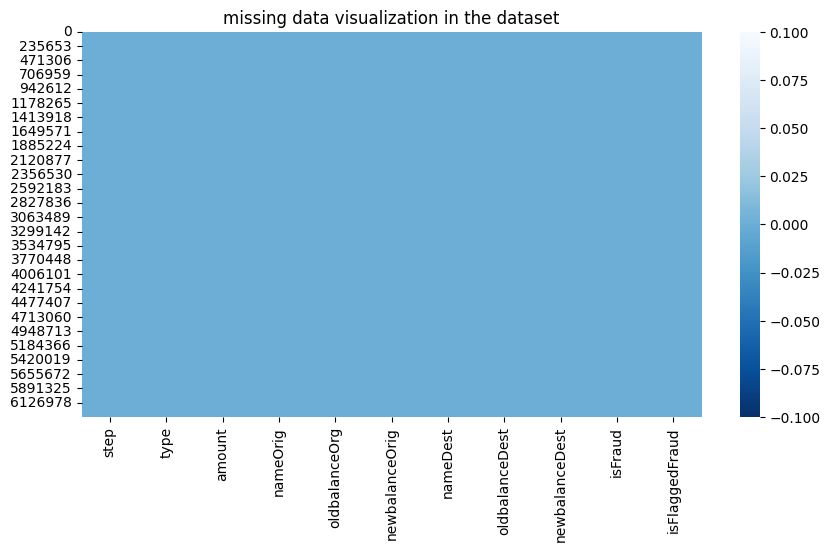

In [ ]:
plt.figure(figsize = (10,5))
plt.title ("missing data visualization in the dataset")
sns.heatmap(Fraud_D.isnull(), cbar =True, cmap= "Blues_r")

Text(0, 0.5, 'count of online transaction type ')

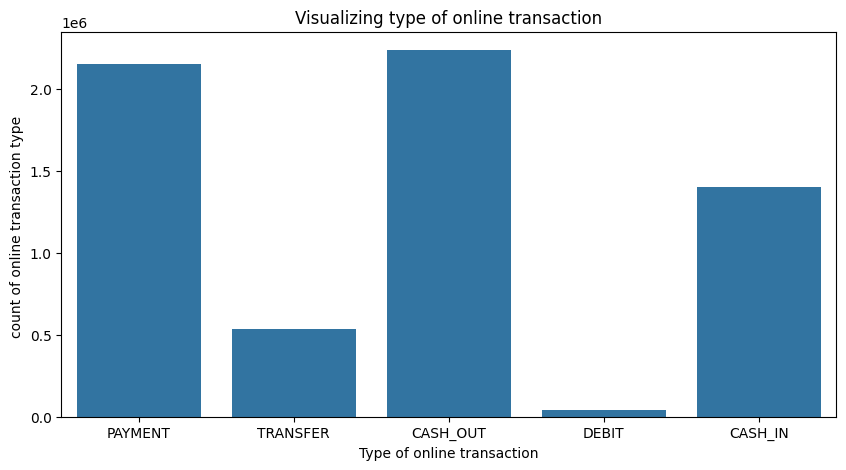

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot (x="type", data= Fraud_D)
plt.title ("Visualizing type of online transaction")
plt.xlabel("Type of online transaction")
plt.ylabel("count of online transaction type ")

<Axes: title={'center': 'Fraudulent Transactions'}, ylabel='count'>

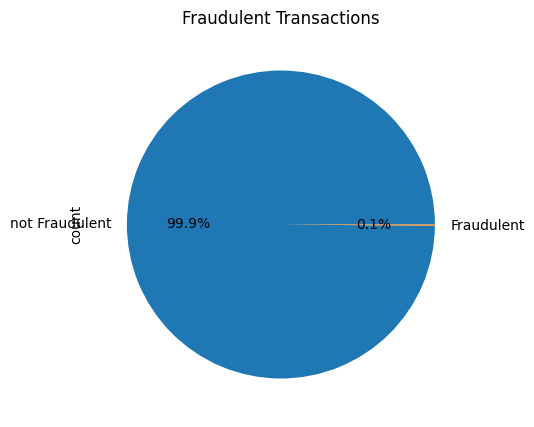

In [ ]:
def Fraud (x):
    if x ==1:
        return "Fraudulent"
    else:
        return "not Fraudulent"

# create a new column
Fraud_D["fraud_transaction_label"] = Fraud_D["isFraud"].apply(Fraud)


# create visualization
plt.figure(figsize = (10,5))
plt.title ("Fraudulent Transactions")
Fraud_D.fraud_transaction_label.value_counts().plot.pie(autopct='%1.1f%%')

In [ ]:
Fraud_D.fraud_transaction_label.value_counts()

,count
fraud_transaction_label,
not Fraudulent,6354407
Fraudulent,8213


In [ ]:
8213/6354407*100

0.129248881917699

<Axes: xlabel='step', ylabel='Density'>

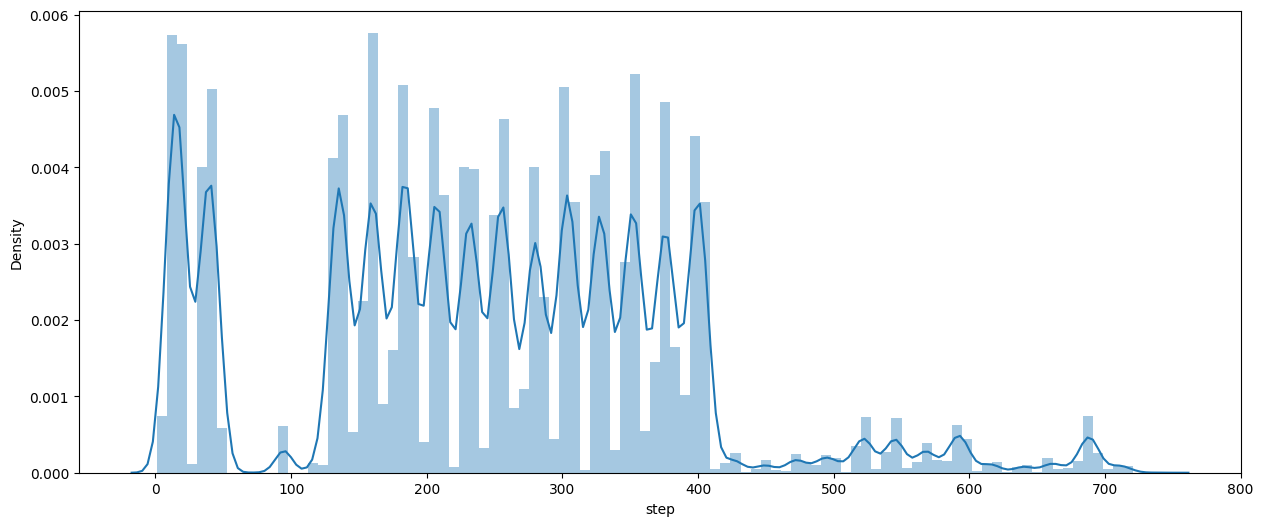

In [ ]:
#To disable warnings
import warnings
warnings.filterwarnings("ignore")

# Visualization for step column

plt.figure(figsize=(15,6))
sns.distplot(Fraud_D['step'],bins=100)

<Axes: xlabel='amount', ylabel='Count'>

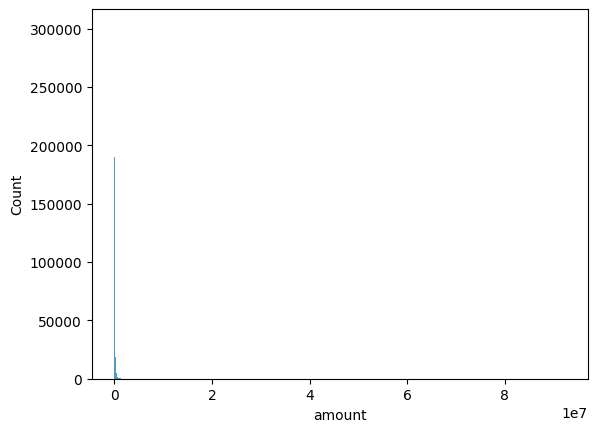

In [ ]:
sns.histplot(x= "amount", data =Fraud_D)

In [ ]:
Fraud_D.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,fraud_transaction_label
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,not Fraudulent
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,not Fraudulent
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,Fraudulent
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,Fraudulent
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,not Fraudulent


<Axes: xlabel='type', ylabel='amount'>

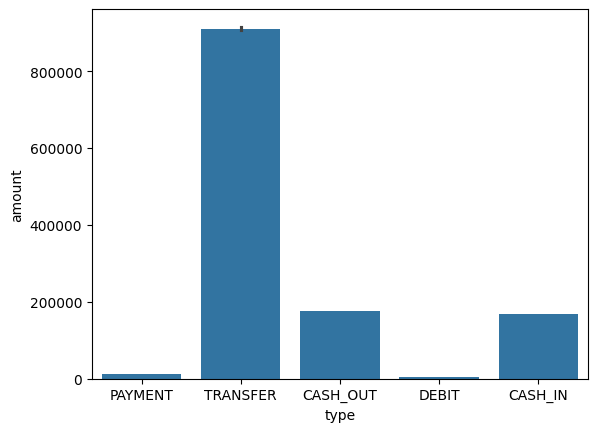

In [ ]:
# Bivariate Analysis

sns.barplot(x='type',y='amount',data=Fraud_D)

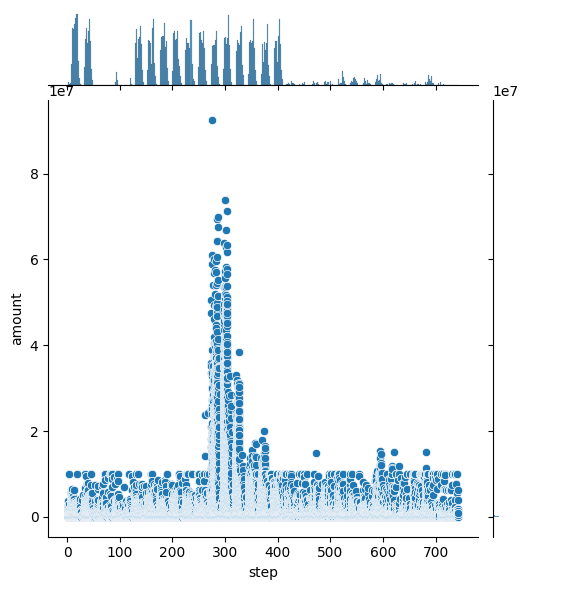

In [ ]:
# Visualization between step and amount

sns.jointplot(x='step',y='amount',data=Fraud_D)

<Axes: xlabel='amount', ylabel='step'>

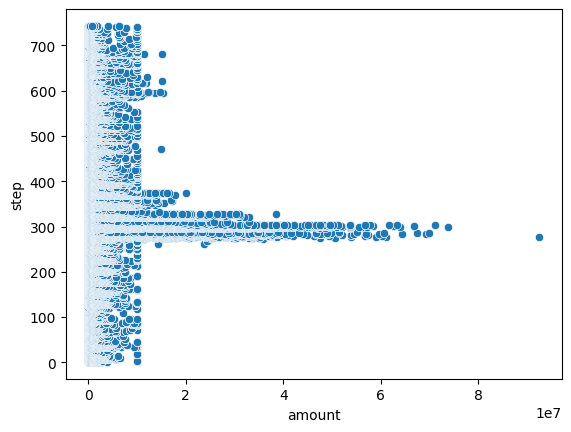

In [ ]:
sns.scatterplot(x=Fraud_D["amount"], y=Fraud_D["step"])

Text(0, 0.5, 'fraud_transaction_label')

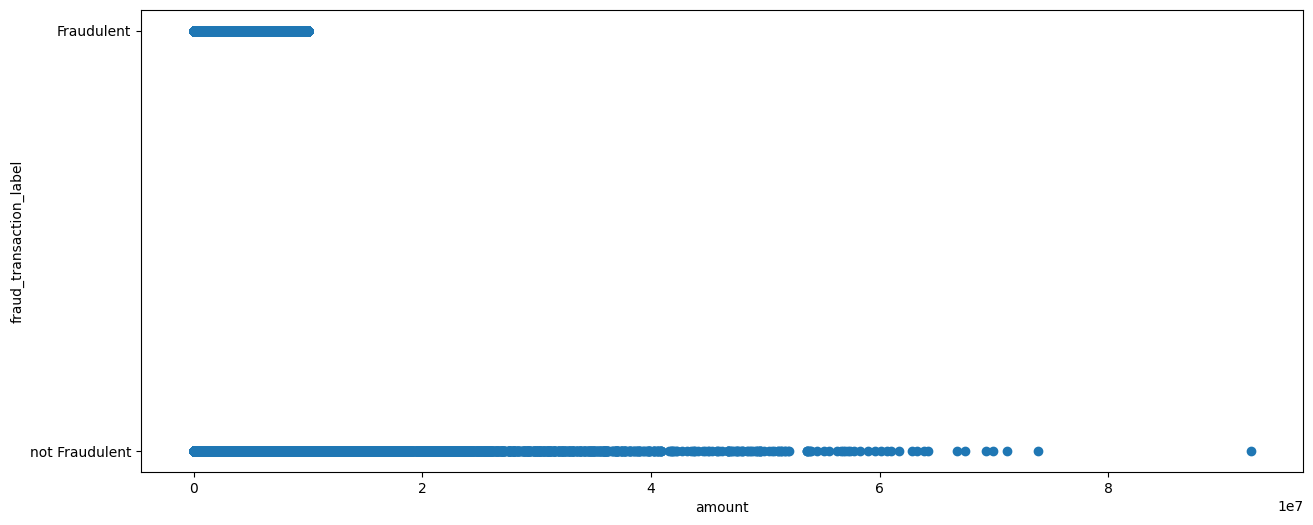

In [ ]:
# Visualization between amount and fraud_transaction_label

plt.figure(figsize=(15,6))
plt.scatter(x='amount',y='fraud_transaction_label',data=Fraud_D)
plt.xlabel('amount')
plt.ylabel('fraud_transaction_label')

Text(0, 0.5, 'fraud_transaction_label')

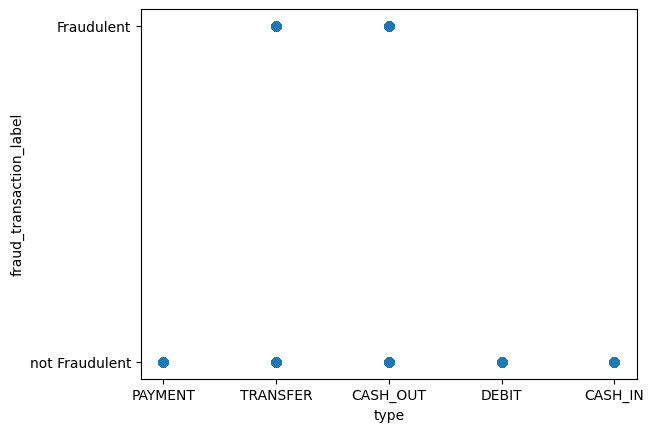

In [ ]:
# Visualization between type and isfraud_label

plt.scatter(x='type',y='fraud_transaction_label',data=Fraud_D)
plt.xlabel('type')
plt.ylabel('fraud_transaction_label')

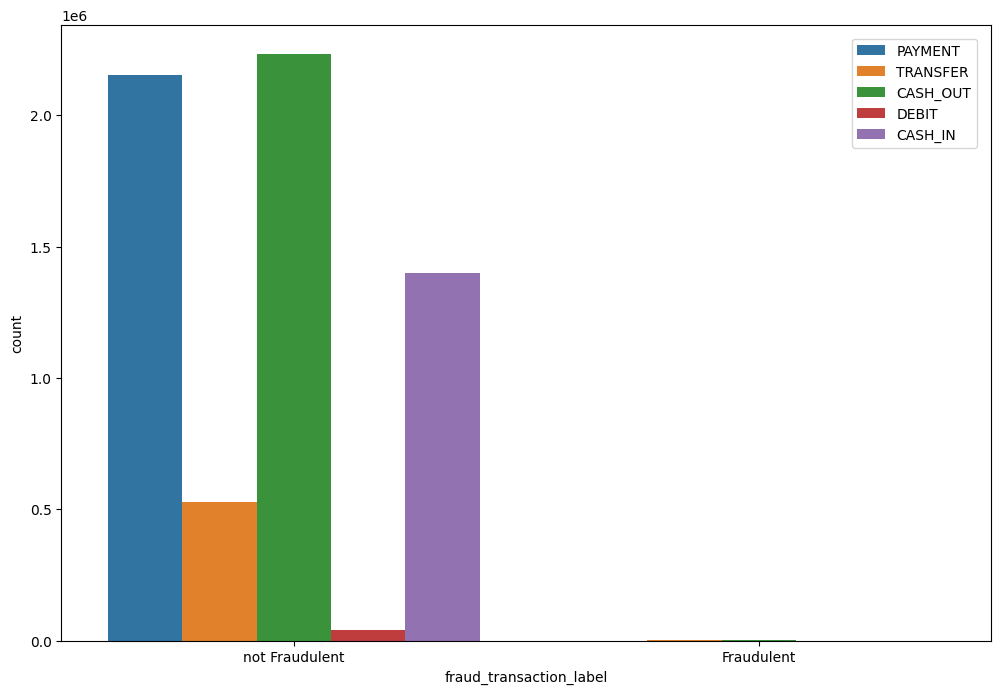

In [ ]:
# Visualization between type and isfraud_label

plt.figure(figsize=(12,8))
sns.countplot(x='fraud_transaction_label',data=Fraud_D,hue='type')
plt.legend(loc=[0.85,0.8])

<Axes: xlabel='type', ylabel='step'>

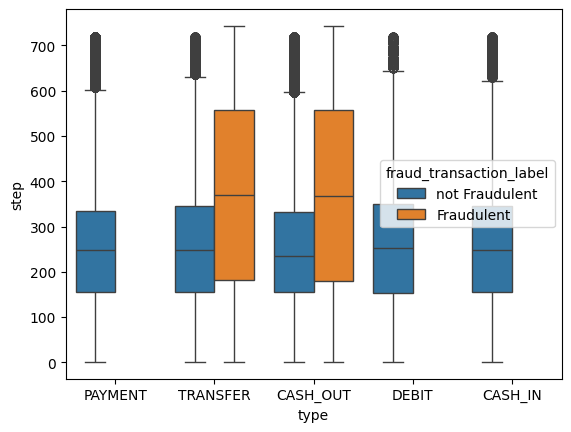

In [ ]:
# Visualizing btw step,type and isFraud_label

sns.boxplot(x= "type", y= "step", hue ="fraud_transaction_label", data= Fraud_D)

In [ ]:
sns.pairplot(Fraud_D)

<Axes: >

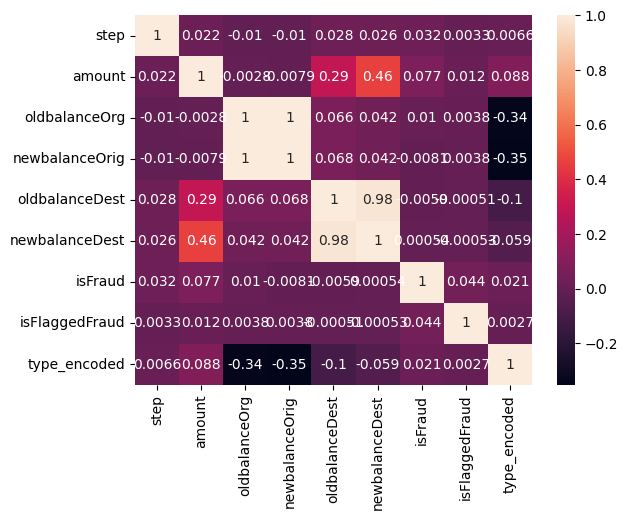

In [ ]:
# Correlation

# Convert 'type' column to numerical using Label Encoding before calculating correlation
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Fraud_D['type_encoded'] = le.fit_transform(Fraud_D['type'])

# Calculate correlation on numerical columns, including the encoded 'type'
corel = Fraud_D.select_dtypes(include=np.number).corr()
sns.heatmap(corel, annot=True)

In [ ]:
# One Hot Encoding
#1. select categorical variables

categorical = ['type']

In [ ]:
#2. use pd.get_dummies() for one hot encoding
#replace pass with your code

categories_dummies = pd.get_dummies(Fraud_D[categorical])

#view what you have done
categories_dummies.head()

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,False,True
3,False,True,False,False,False
4,False,False,False,True,False


In [ ]:
#join the encoded variables back to the main dataframe using pd.concat()
#pass both data and categories_dummies as a list of their names
#pop out documentation for pd.concat() to clarify

Fraud_D = pd.concat([Fraud_D,categories_dummies], axis=1)

#check what you have done
print(Fraud_D.shape)
Fraud_D.head()

(6362620, 18)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,fraud_transaction_label,type_encoded,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,not Fraudulent,3,False,False,False,True,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,not Fraudulent,3,False,False,False,True,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,Fraudulent,4,False,False,False,False,True
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,Fraudulent,1,False,True,False,False,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,not Fraudulent,3,False,False,False,True,False


In [ ]:
Fraud_D.fraud_transaction_label.value_counts()

,count
fraud_transaction_label,
not Fraudulent,6354407
Fraudulent,8213


In [ ]:


# Class count
count_class_0, count_class_1 = Fraud_D.fraud_transaction_label.value_counts()

# Divide by class
df_class_0 = Fraud_D[Fraud_D['fraud_transaction_label'] == 'not Fraudulent']
df_class_1 = Fraud_D[Fraud_D['fraud_transaction_label'] == 'Fraudulent']
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.fraud_transaction_label.value_counts())

Random over-sampling:
fraud_transaction_label
not Fraudulent    6354407
Fraudulent        6354407
Name: count, dtype: int64


In [ ]:
df_test_over.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,fraud_transaction_label
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,not Fraudulent
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,not Fraudulent
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,not Fraudulent
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0,not Fraudulent
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0,not Fraudulent


In [ ]:
df_test_over.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,fraud_transaction_label
6040170,487,TRANSFER,1610110.66,C56372848,1610110.66,0.0,C583505603,0.0,0.00,1,0,Fraudulent
3594476,262,TRANSFER,340936.99,C1355922572,340936.99,0.0,C1385531545,0.0,0.00,1,0,Fraudulent
5852,6,TRANSFER,26768.50,C457596841,26768.50,0.0,C1956477953,0.0,0.00,1,0,Fraudulent
1932085,170,CASH_OUT,908858.12,C529588126,908858.12,0.0,C383086012,0.0,908858.12,1,0,Fraudulent
6049707,493,CASH_OUT,1214511.61,C1966863341,1214511.61,0.0,C570490831,0.0,1214511.61,1,0,Fraudulent


In [ ]:
df_test_over.shape

(12708814, 12)

In [ ]:
df_test_over_20 = df_test_over.sample(frac=0.01, random_state=42)  # Use random_state for reproducibility

df_test_over_20.shape

(127088, 12)

In [ ]:
X = df_test_over_20[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig']]
y = df_test_over_20['fraud_transaction_label']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Scale the features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Train a RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions and evaluate
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) # Make sure accuracy_score is imported
print(f"Accuracy: {accuracy}")

Accuracy: 0.9978361790856873


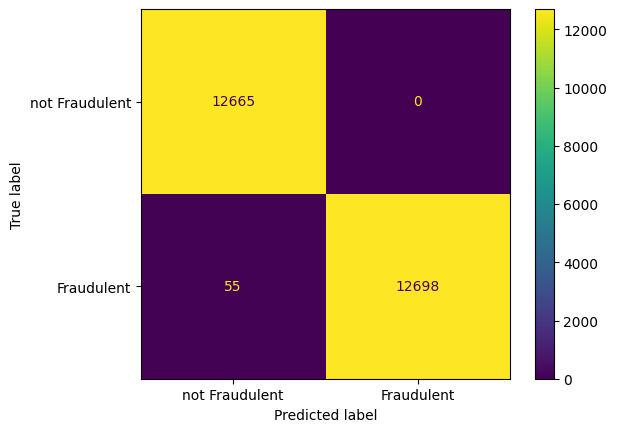

Accuracy: 0.9978361790856873


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



y_pred = rf_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['not Fraudulent', 'Fraudulent']) # Assuming labels
disp.plot()
plt.show()

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

In [ ]:
import joblib

joblib.dump(scaler, 'scaler_online.pkl')
joblib.dump(rf_classifier, 'rf_classifier_online.pkl')

['rf_classifier_online.pkl']

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Initialize each models
LR = LogisticRegression(random_state=42)
KN = KNeighborsClassifier()
DC = DecisionTreeClassifier(random_state=42)
RF = RandomForestClassifier(random_state=42)

In [ ]:
#create list of your model names
models = [LR,KN,DC,RF]

In [ ]:
def plot_confusion_matrix(y_test,prediction):
    cm_ = confusion_matrix(y_test,prediction)
    plt.figure(figsize = (6,4))
    sns.heatmap(cm_, cmap ='coolwarm', linecolor = 'white', linewidths = 1, annot = True, fmt = 'd')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
#create function to train a model and evaluate accuracy
def trainer(model,X_train,y_train,X_test,y_test):
    #fit your model
    model.fit(X_train,y_train)
    #predict on the fitted model
    prediction = model.predict(X_test)
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction,y_test)))
    print(classification_report(y_test, prediction)) #use this later
    plot_confusion_matrix(y_test,prediction)


For LogisticRegression, Accuracy score is 0.8148556141317177 

              precision    recall  f1-score   support

           0       0.89      0.71      0.79     12665
           1       0.76      0.92      0.83     12753

    accuracy                           0.81     25418
   macro avg       0.83      0.81      0.81     25418
weighted avg       0.83      0.81      0.81     25418



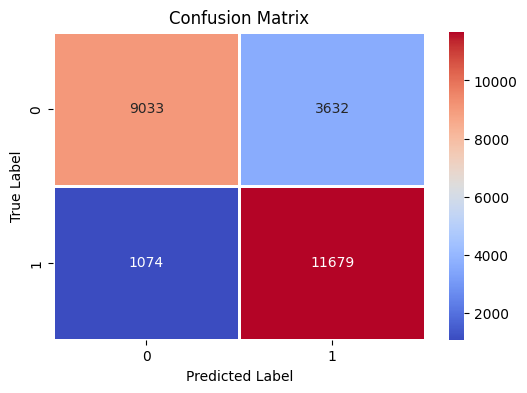


For KNeighborsClassifier, Accuracy score is 0.9867810213234716 

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     12665
           1       1.00      0.97      0.99     12753

    accuracy                           0.99     25418
   macro avg       0.99      0.99      0.99     25418
weighted avg       0.99      0.99      0.99     25418



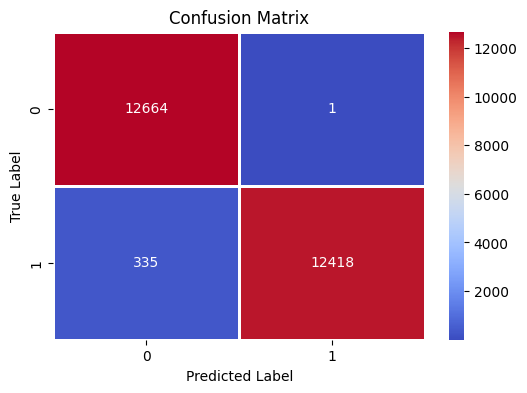


For DecisionTreeClassifier, Accuracy score is 0.9979542056810135 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12665
           1       1.00      1.00      1.00     12753

    accuracy                           1.00     25418
   macro avg       1.00      1.00      1.00     25418
weighted avg       1.00      1.00      1.00     25418



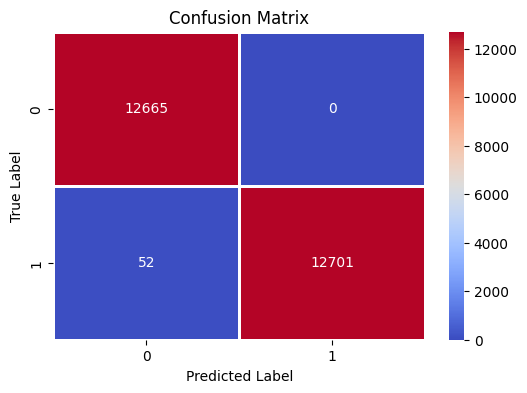


For RandomForestClassifier, Accuracy score is 0.9978361790856873 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12665
           1       1.00      1.00      1.00     12753

    accuracy                           1.00     25418
   macro avg       1.00      1.00      1.00     25418
weighted avg       1.00      1.00      1.00     25418



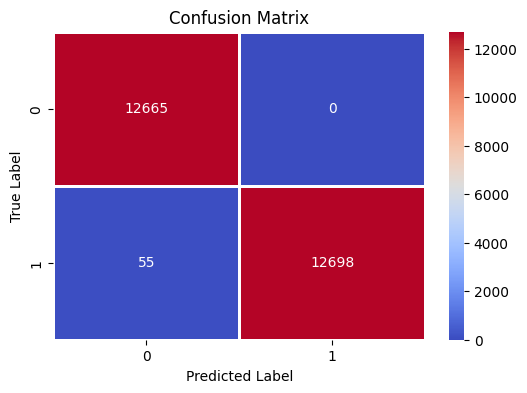

In [ ]:
#loop through each model, training in the process
for model in models:
    trainer(model,X_train,y_train,X_test,y_test)
